In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


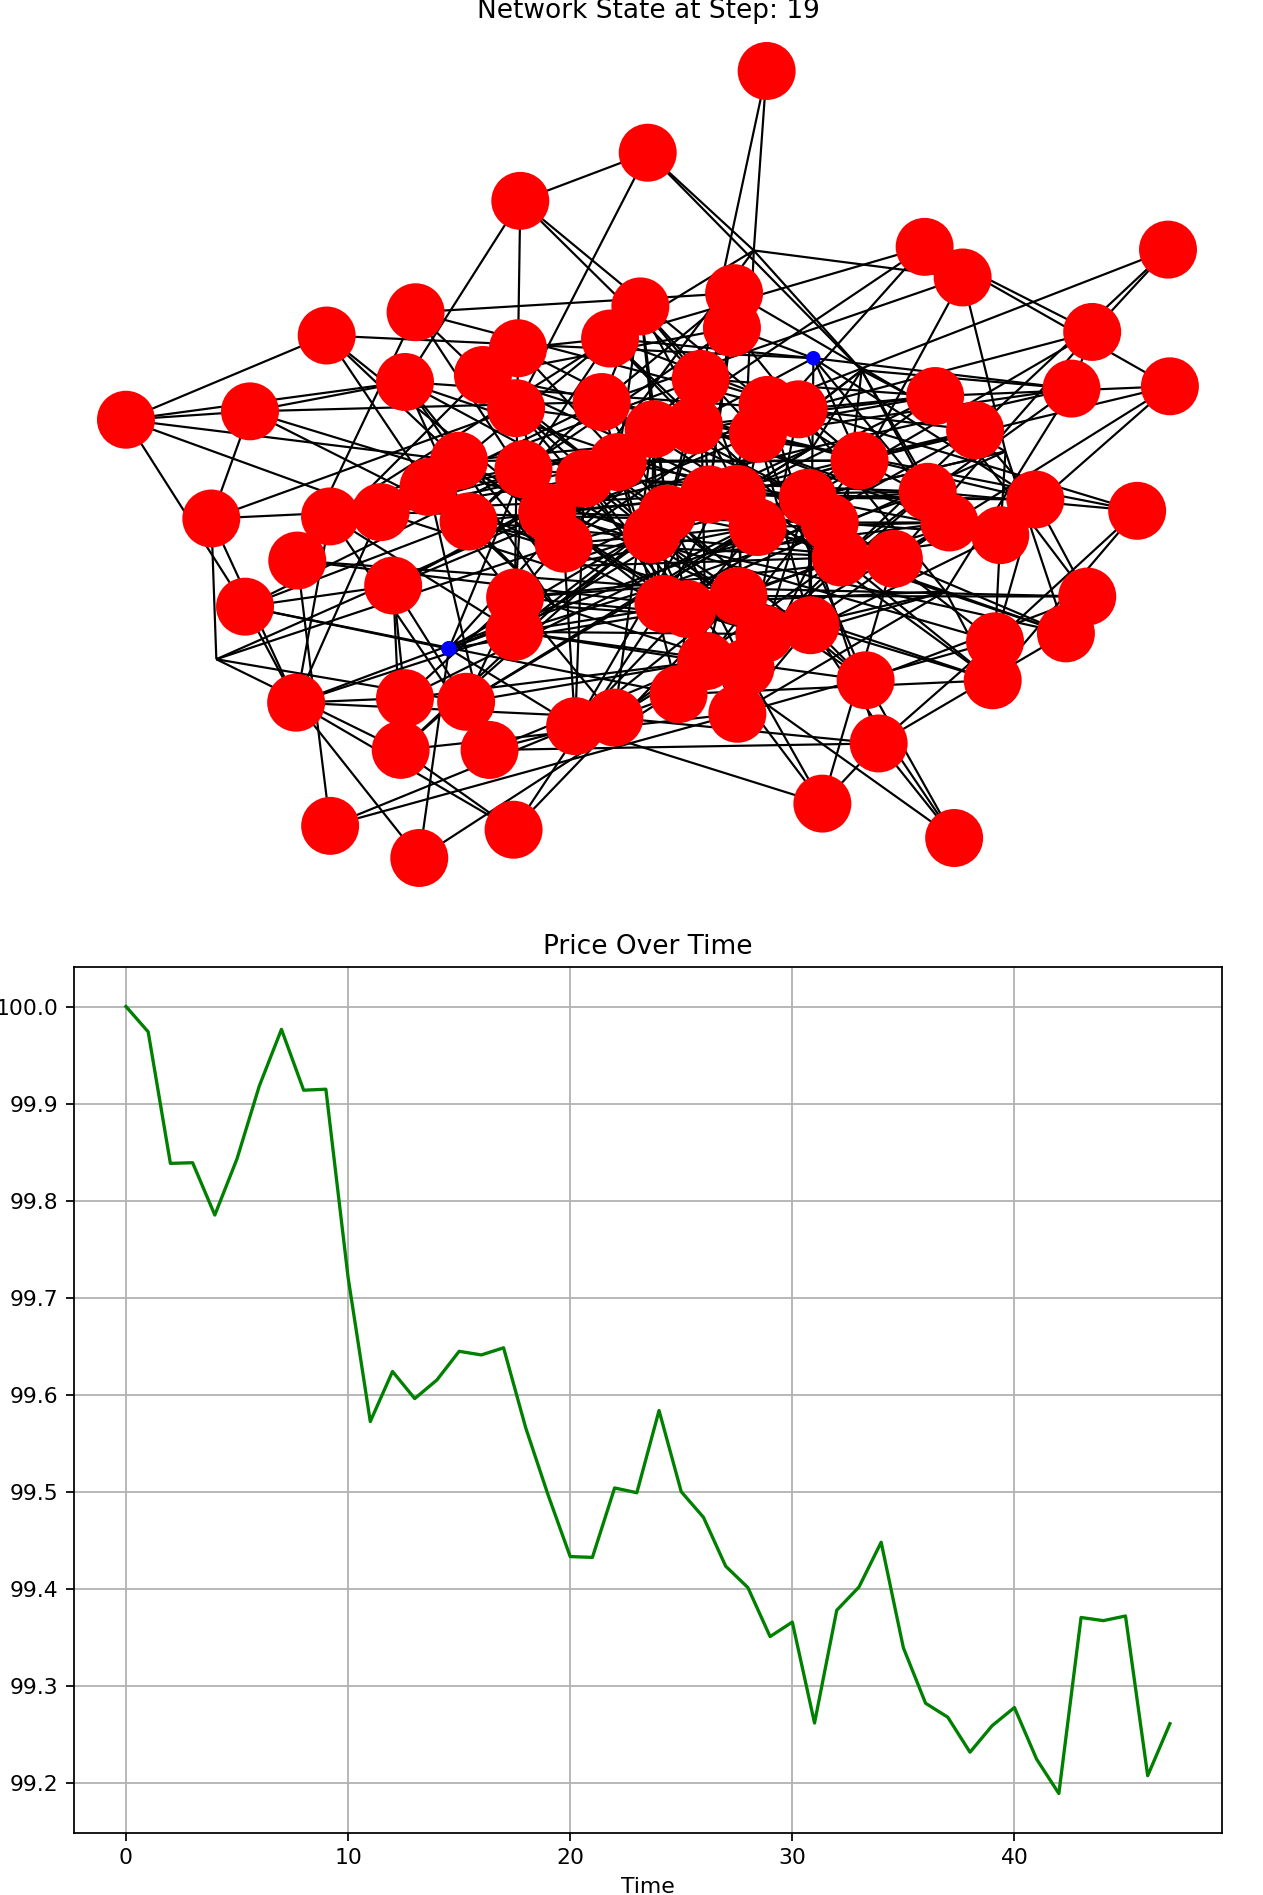

In [14]:
# Parameters for the network
N = 100  # Number of nodes (agents)
p = 0.08  # Probability of edge creation
F = 100  # Fundamental value
initial_price = 100  # Initial price
cp = 0.005  # Sensitivity of price to transaction quantity
timesteps = 25  # Number of timesteps for the animation
c_fu = 0.2  # Sensitivity of fundamentalists to news
c_im = 0.7  # Sensitivity of imitators to news

# Initialize the network and assign agent types
G = nx.erdos_renyi_graph(N, p)
for i in G.nodes():
    G.nodes[i]['type'] = 'imitator' if np.random.rand() < 0.1 else 'fundamentalist'
    G.nodes[i]['transaction_quantity'] = 0

# Initialize the price list
prices = [initial_price]

# Function to update the network with news influence
def update_network(G, prices, F, cp, c_fu, c_im):
    total_transaction_quantity = 0
    news_fu = np.random.randn()  # News for fundamentalists
    news_im = np.random.randn()  # News for imitators

    for i in G.nodes():
        if G.nodes[i]['type'] == 'fundamentalist':
            eta_fu = 1 + c_fu * news_fu
            perceived_F = F * eta_fu
            G.nodes[i]['transaction_quantity'] = perceived_F - prices[-1]
        else:  # Imitator
            neighbors = list(G.neighbors(i))
            eta_im = 1 + c_im * news_im
            if neighbors:
                avg_neighbor_quantity = np.mean([G.nodes[n]['transaction_quantity'] for n in neighbors])
                G.nodes[i]['transaction_quantity'] = avg_neighbor_quantity * eta_im
            else:
                G.nodes[i]['transaction_quantity'] = 0
        total_transaction_quantity += G.nodes[i]['transaction_quantity']

    new_price = max(prices[-1] + (cp * total_transaction_quantity) / N, 0)
    prices.append(new_price)

# Position nodes using a spring layout for visual appeal
pos = nx.spring_layout(G)

# Prepare figure for animation with two subplots: one for the network and one for the price plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Animation function
def animate(t):
    ax1.clear()
    update_network(G, prices, F, cp, c_fu, c_im)
    node_colors = ['red' if G.nodes[node]['type'] == 'fundamentalist' else 'blue' for node in G]
    node_sizes = [G.nodes[node]['transaction_quantity'] * 50 for node in G]
    nx.draw_networkx(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax1, with_labels=False)
    ax1.set_title(f"Network State at Step: {t}")
    ax1.axis('off')

    # Update the price plot on the second subplot
    ax2.clear()
    ax2.plot(prices, color='green')
    ax2.set_title("Price Over Time")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Price")
    ax2.grid(True)

# Create the animation
ani = FuncAnimation(fig, animate, frames=range(timesteps), interval=200)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


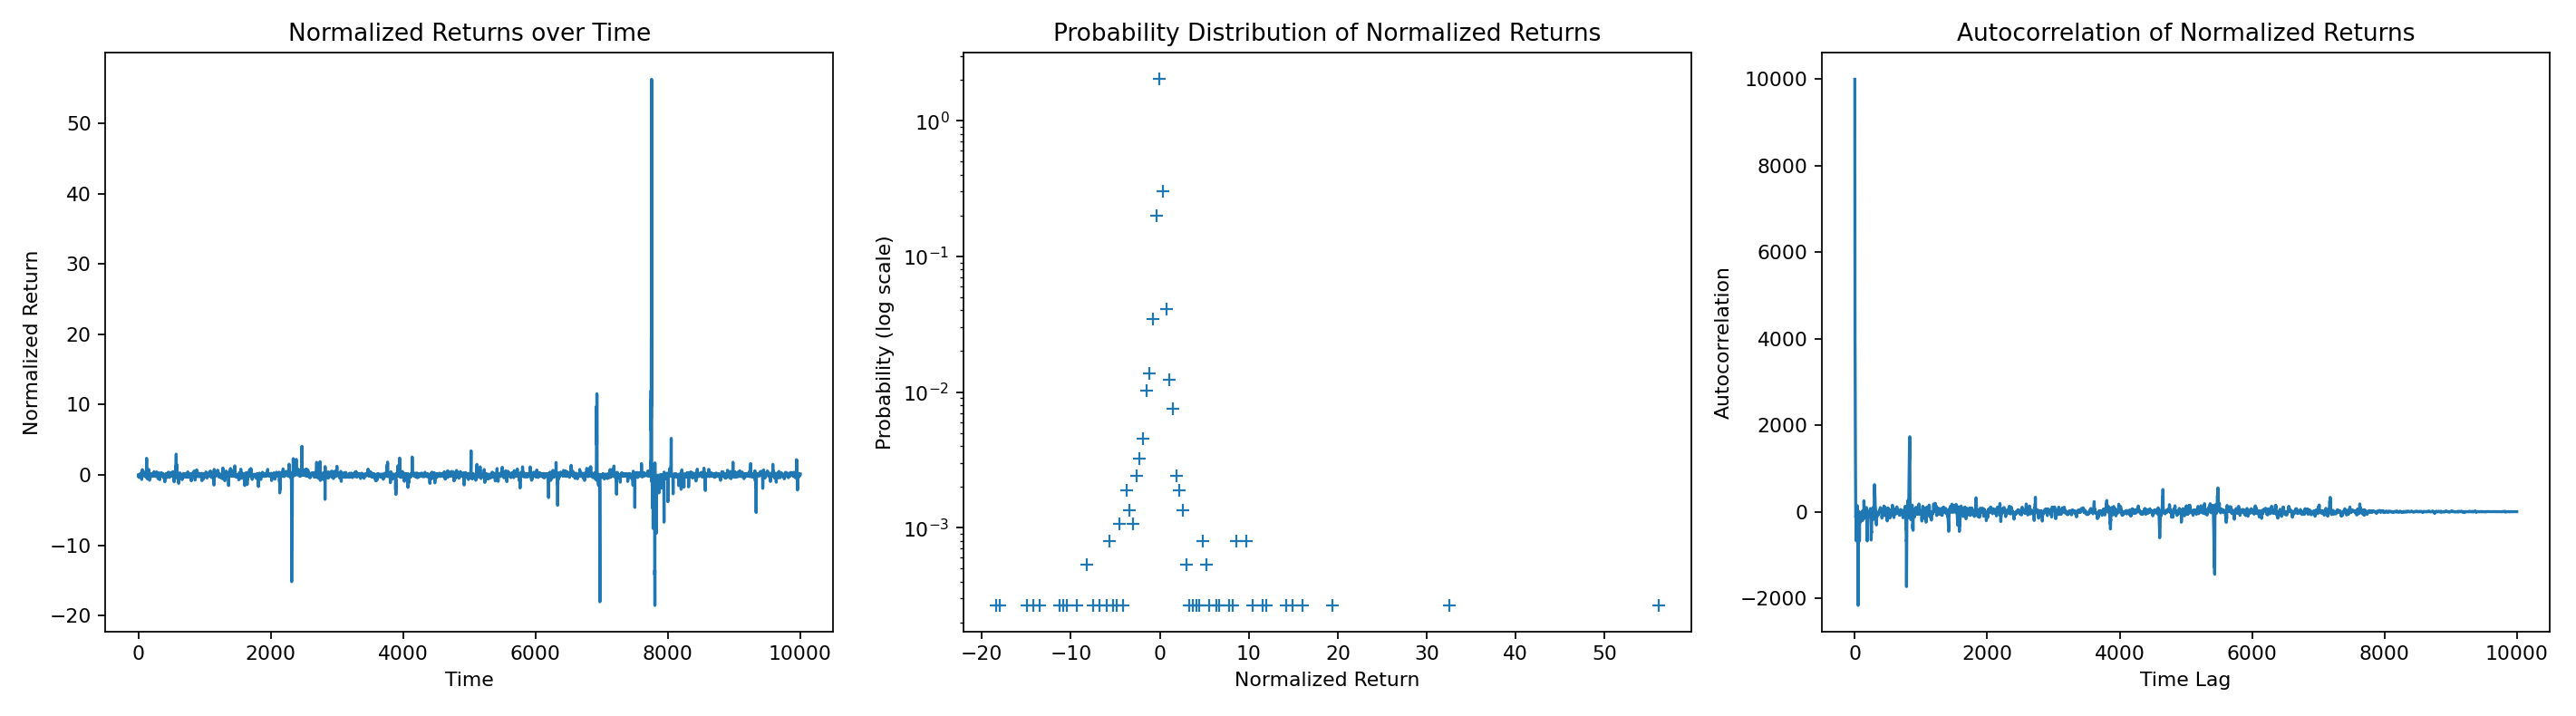

In [24]:
# Parameters for the simulation
N = 100  # Number of nodes (agents)
p = 0.08  # Probability of edge creation
F = 100  # Fundamental value
initial_price = 100  # Initial price
cp = 0.005  # Sensitivity of price to transaction quantity
timesteps = 10000  # Number of timesteps for the simulation
c_fu = 0.2  # Sensitivity of fundamentalists to news
c_im = 0.7  # Sensitivity of imitators to news


# Given function to update the network (needs to be defined)
def update_network(G, prices, F, cp, c_fu, c_im):
    total_transaction_quantity = 0
    news_fu = np.random.randn()  # News for fundamentalists
    news_im = np.random.randn()  # News for imitators

    for i in G.nodes():
        if G.nodes[i]['type'] == 'fundamentalist':
            eta_fu = 1 + c_fu * news_fu
            perceived_F = F * eta_fu
            G.nodes[i]['transaction_quantity'] = perceived_F - prices[-1]
        else:  # Imitator
            neighbors = list(G.neighbors(i))
            eta_im = 1 + c_im * news_im
            if neighbors:
                avg_neighbor_quantity = np.mean([G.nodes[n]['transaction_quantity'] for n in neighbors])
                G.nodes[i]['transaction_quantity'] = avg_neighbor_quantity * eta_im
            else:
                G.nodes[i]['transaction_quantity'] = 0
        total_transaction_quantity += G.nodes[i]['transaction_quantity']

    new_price = max(prices[-1] + (cp * total_transaction_quantity) / N, 0)
    prices.append(new_price)


# Initialize the network and assign agent types
G = nx.erdos_renyi_graph(N, p)
for i in G.nodes():
    G.nodes[i]['type'] = 'imitator' if np.random.rand() < 0.7 else 'fundamentalist'
    G.nodes[i]['transaction_quantity'] = 0

# Initialize the price list and returns
prices = [initial_price]
returns = []

# Simulation function
for t in range(timesteps):
    update_network(G, prices, F, cp, c_fu, c_im)
    returns.append(prices[-1] - prices[-2] if t > 0 else 0)

# Normalize the returns
mean_return = np.mean(returns)
std_return = np.std(returns)
normalized_returns = [(ret - mean_return) / std_return for ret in returns]

# Calculate the distribution of normalized returns
# Use more bins for higher resolution in the histogram
hist, bins = np.histogram(normalized_returns, bins=200, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Autocorrelation
autocorr_returns = np.correlate(normalized_returns, normalized_returns, mode='full')
autocorr_returns = autocorr_returns[autocorr_returns.size // 2:]

# Plot the figures
plt.figure(figsize=(18, 5))

# Plot (a) Time series of normalized returns
plt.subplot(1, 3, 1)
plt.plot(normalized_returns)
plt.xlabel('Time')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns over Time')

# Plot (b) Distribution of normalized returns with only y-axis in log scale
plt.subplot(1, 3, 2)
plt.semilogy(bin_centers, hist, linestyle='None', marker='+')
plt.xlabel('Normalized Return')
plt.ylabel('Probability (log scale)')
plt.title('Probability Distribution of Normalized Returns')

# Plot (c) Autocorrelation function of returns
plt.subplot(1, 3, 3)
plt.plot(autocorr_returns)
plt.xlabel('Time Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Normalized Returns')

plt.tight_layout()
plt.show()